# Wine Quality Prediction and Clustering Analysis

## Project Overview

This project aims to analyze and predict the quality of wines based on various physicochemical properties. The dataset consists of red and white wine samples, with several features such as acidity, alcohol content, sugar levels, and pH, along with a target variable indicating the quality of each wine. The goal is to predict wine quality and identify patterns using clustering techniques.

## Type of Learning/Algorithm

This project employs **unsupervised learning** for clustering analysis and **supervised learning** for regression tasks. The following algorithms are used in this analysis:

- **Clustering (Unsupervised Learning)**:
  - K-Means
  - Agglomerative Clustering

- **Regression (Supervised Learning)**:
  - Linear Regression

## Type of Task

The task associated with this dataset involves **predicting wine quality** using the following approaches:

- **Clustering**: Unsupervised learning models are used to group wines into clusters, and then the clusters are mapped to quality labels based on their most frequent quality scores.
  
- **Regression**: A supervised learning approach using Linear Regression to predict continuous wine quality scores.

## Data Overview

The dataset contains the following features related to the wine’s characteristics:
- **Fixed acidity**
- **Volatile acidity**
- **Citric acid**
- **Residual sugar**
- **Chlorides**
- **Free sulfur dioxide**
- **Total sulfur dioxide**
- **Density**
- **pH**
- **Sulphates**
- **Alcohol**

Additionally, there are two datasets: one for **red wine** and one for **white wine**, each containing a `quality` score that indicates the quality of the wine (integer values from 3 to 9). 

## Data Cleaning

- Missing values: None (the dataset is clean with no missing values).
- Duplicates: Removed any duplicate records to ensure the integrity of the data.

## Citation

- UCI Machine Learning Repository. (n.d.). *Wine Quality Dataset*. Retrieved from https://archive.ics.uci.edu/dataset/186/wine+quality



In [2]:
# ### Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
# ### Set File Paths and Constants
RED_WINE_PATH = 'winequality-red.csv'  # Path to the red wine quality dataset
WHITE_WINE_PATH = 'winequality-red.csv'  # Path to the white wine quality dataset
TARGET_VARIABLE = 'quality'  # Target variable name
FEATURES = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol',
    # 'quality', 'wine_type', 'wine_type_factor'
] # Features for clustering

In [4]:
# ### Load the Datasets
red_wine_data = pd.read_csv(RED_WINE_PATH, sep=';')
white_wine_data = pd.read_csv(WHITE_WINE_PATH, sep=';')

# Add a column to indicate the wine type
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'

# Concatenate the datasets
data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# ### Data Cleaning
# Check for duplicates and drop if any
data.drop_duplicates(inplace=True)


# ### Data Overview
print(f"Dataset shape: {data.shape} = (examples, features + target).")
print(f"Features: {data.columns.tolist()}")
print(f"Missing values: \n{data.isnull().sum()}")

Dataset shape: (2718, 13) = (examples, features + target).
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']
Missing values: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [5]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
3      9.8        6       red  
5      9.4        5       red

In [6]:
# ### Print Data Types of Columns
print(data.dtypes)

# ### Print Unique Values of Features
print( "\nUnique Values of Features:\n", sorted(list(data[TARGET_VARIABLE].unique())) )

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

Unique Values of Features:
 [3, 4, 5, 6, 7, 8]


In [7]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2718.000000       2718.000000  2718.000000     2718.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736670          0.182998     0.195501        1.352065   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2718.000000          2718.000000           2718.000000  2718.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049368            10.445348             33.402797     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  2718.000000  2718.000000  2718.000000  2718.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155008     0.170635     1.081866     0.823426  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
data[FEATURES].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   

                       alcohol  
fixed acidity        -0.061596  
volatile acidity     -0.197812  
citric acid           0.105108  
residual sugar        0.063281  
chlorides            -0.223824  
free sulfur dioxide  -0.080125  
total sulfur dioxide -0.217829  
density              -0.504995  
pH                    0.213418  
sulphates             0.091621  
alcohol               1.000000

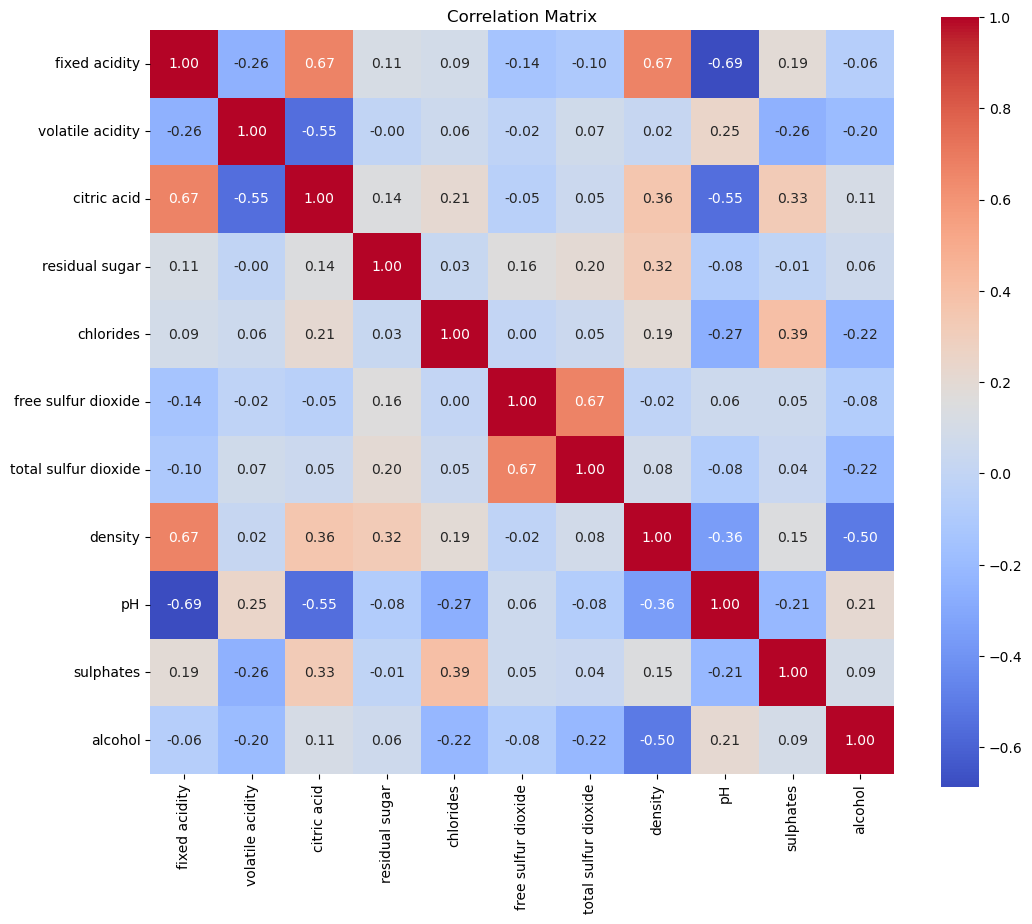

In [9]:
correlation_matrix = data[FEATURES].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            xticklabels=FEATURES, yticklabels=FEATURES)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Create a mapping dictionary
wine_type_mapping = {'red': 0, 'white': 1}

# Apply the mapping to the 'wine_type' column
data['wine_type_factor'] = data['wine_type'].map(wine_type_mapping)

# Print the updated DataFrame to verify the mapping
print(data[['wine_type', 'wine_type_factor']].head())

  wine_type  wine_type_factor
0       red                 0
1       red                 0
2       red                 0
3       red                 0
5       red                 0


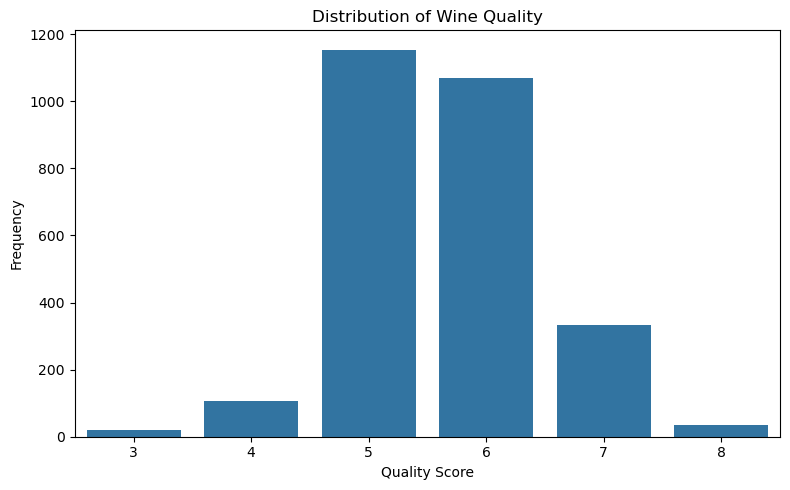

In [11]:
# ### Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable: wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x=TARGET_VARIABLE, data=data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Data Overview

After loading and cleaning the datasets, we get the following summary:

- **Dataset Shape**: The dataset contains 5320 rows (examples) and 13 columns (features including the target `quality` and the `wine_type` column).
- **Features**: The dataset contains the following features:
  - 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'.
- **Missing Values**: There are no missing values in any of the columns, indicating a clean dataset ready for analysis.

- **Data Types**: The columns have the following data types:
  - All feature columns are of type `float64`, except for the `quality` column (which is `int64`) and the `wine_type` column (which is `object`).
- **Unique Values in the Target Variable (`quality`)**: The unique values for wine quality range from 3 to 9.
  - We see that the wine quality has an almost normal distribution with mean rating of 6.

wine_type
red      1359
white    1359
Name: count, dtype: int64


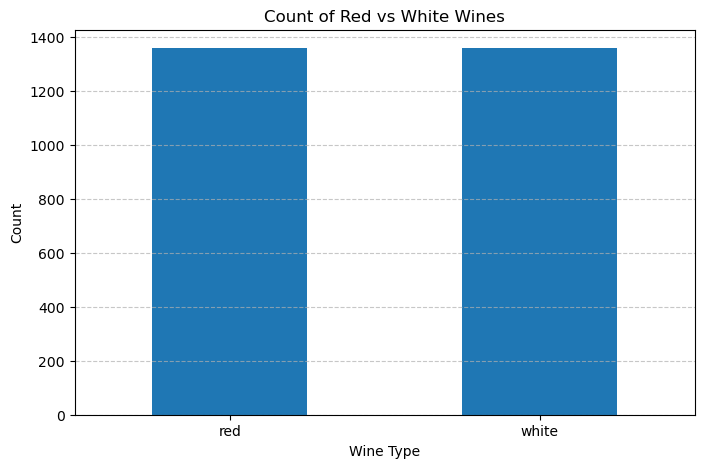

In [13]:
# ### Count of Red vs White
wine_counts = data['wine_type'].value_counts()
print(wine_counts)

# ### Plotting
plt.figure(figsize=(8, 5))
wine_counts.plot(kind='bar')
plt.title('Count of Red vs White Wines')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Distribution white vs. red wine

- We see that there are 3961 white samples, 1359 red samples.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ### Prepare Data for the Clustering Algorithm
# Split the dataset into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

# apply standard scaling to features set
scaler = StandardScaler()
X_train.loc[:, FEATURES] = scaler.fit_transform(X_train.loc[:, FEATURES])
X_test.loc[:, FEATURES] = scaler.transform(X_test.loc[:, FEATURES])

# Print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

X_train.head()
# X_train[FEATURES]

Training set shape: (1902, 14)
Testing set shape: (816, 14)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2165       0.240505          0.953853    -0.161971        0.003708   2.924610   
1877       1.171682         -1.149985     0.901208        3.094261  -0.306101   
323        1.171682          0.344847     0.749325        0.241443   0.052867   
2797      -0.341481         -1.482170    -0.060716       -0.392517  -0.749532   
1202       0.182307         -0.596343     0.597443       -0.551006  -0.411680   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2165            -1.047486             -0.934921  1.296406  0.044182   
1877            -1.047486             -0.993935  0.488848 -0.534918   
323              1.839793              0.776480  1.242569 -0.213196   
2797             0.299911              0.894508 -0.857081 -1.049674   
1202            -0.951244             -1.023441 -0.824779  0.237215   

      sulphates   alcohol  quality wine_type  wine_type_factor  
2165  -0.339782 -1.332547        6     white                 1  
1877   0.953571  2.013578        8     white                 1  
323    0.248106 -0.867807        6       red                 0  
2797   0.777204  0.433464        6     white                 1  
1202   0.189317  1.177047        8       red                 0

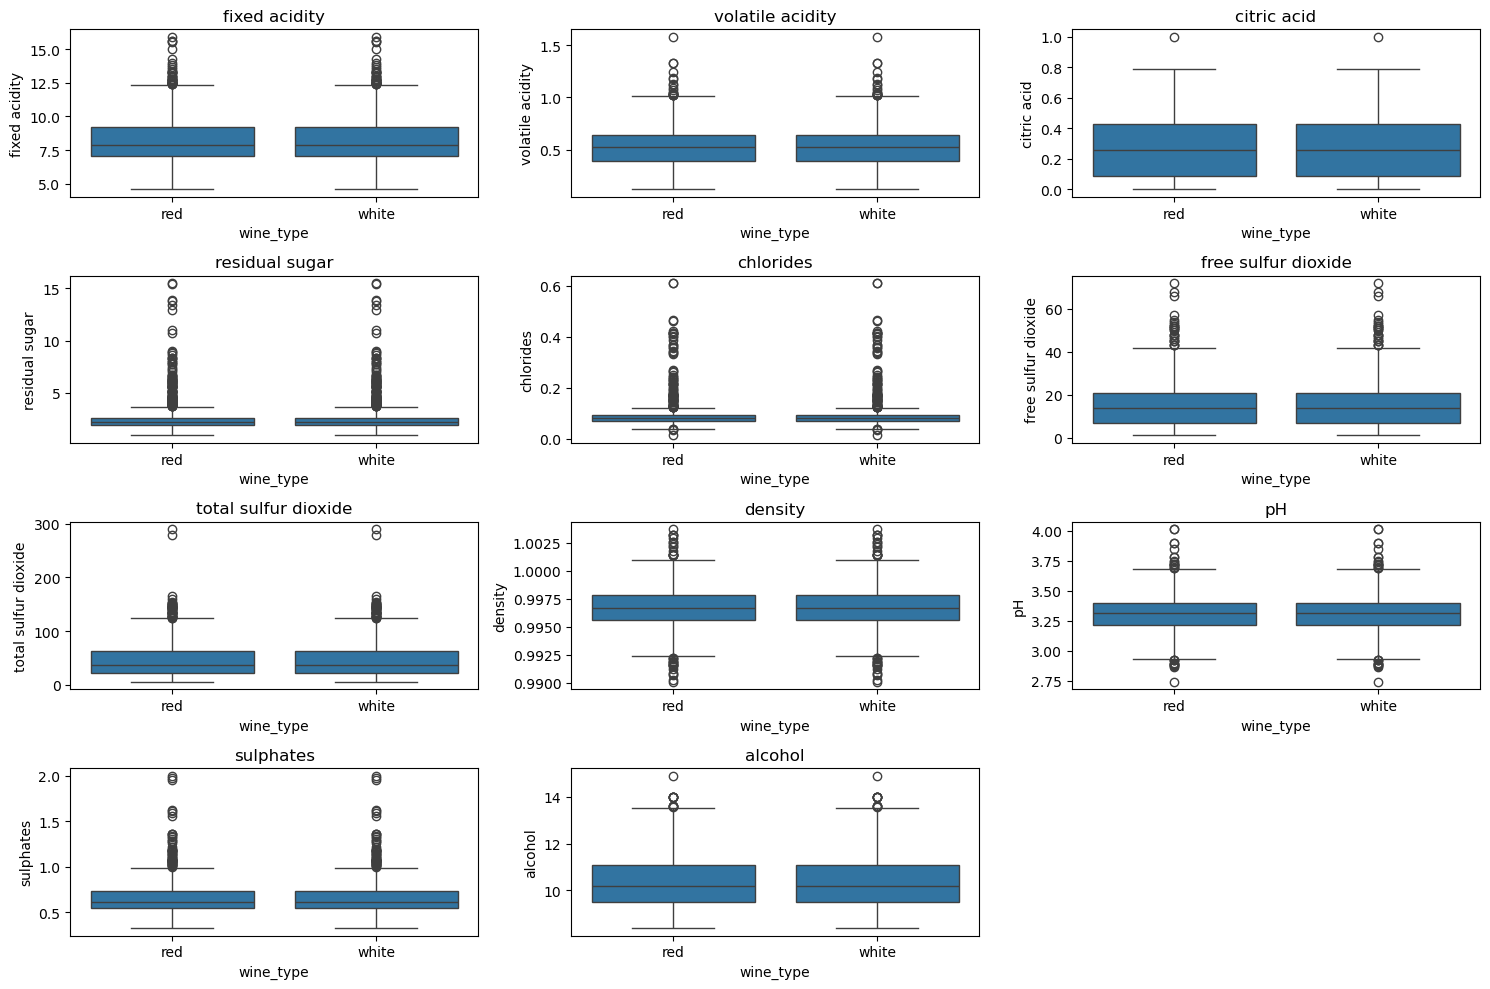

In [16]:


# Create a box plot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(FEATURES):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x='wine_type', y=feature, data=data)
  plt.title(feature)
plt.tight_layout()
plt.show()

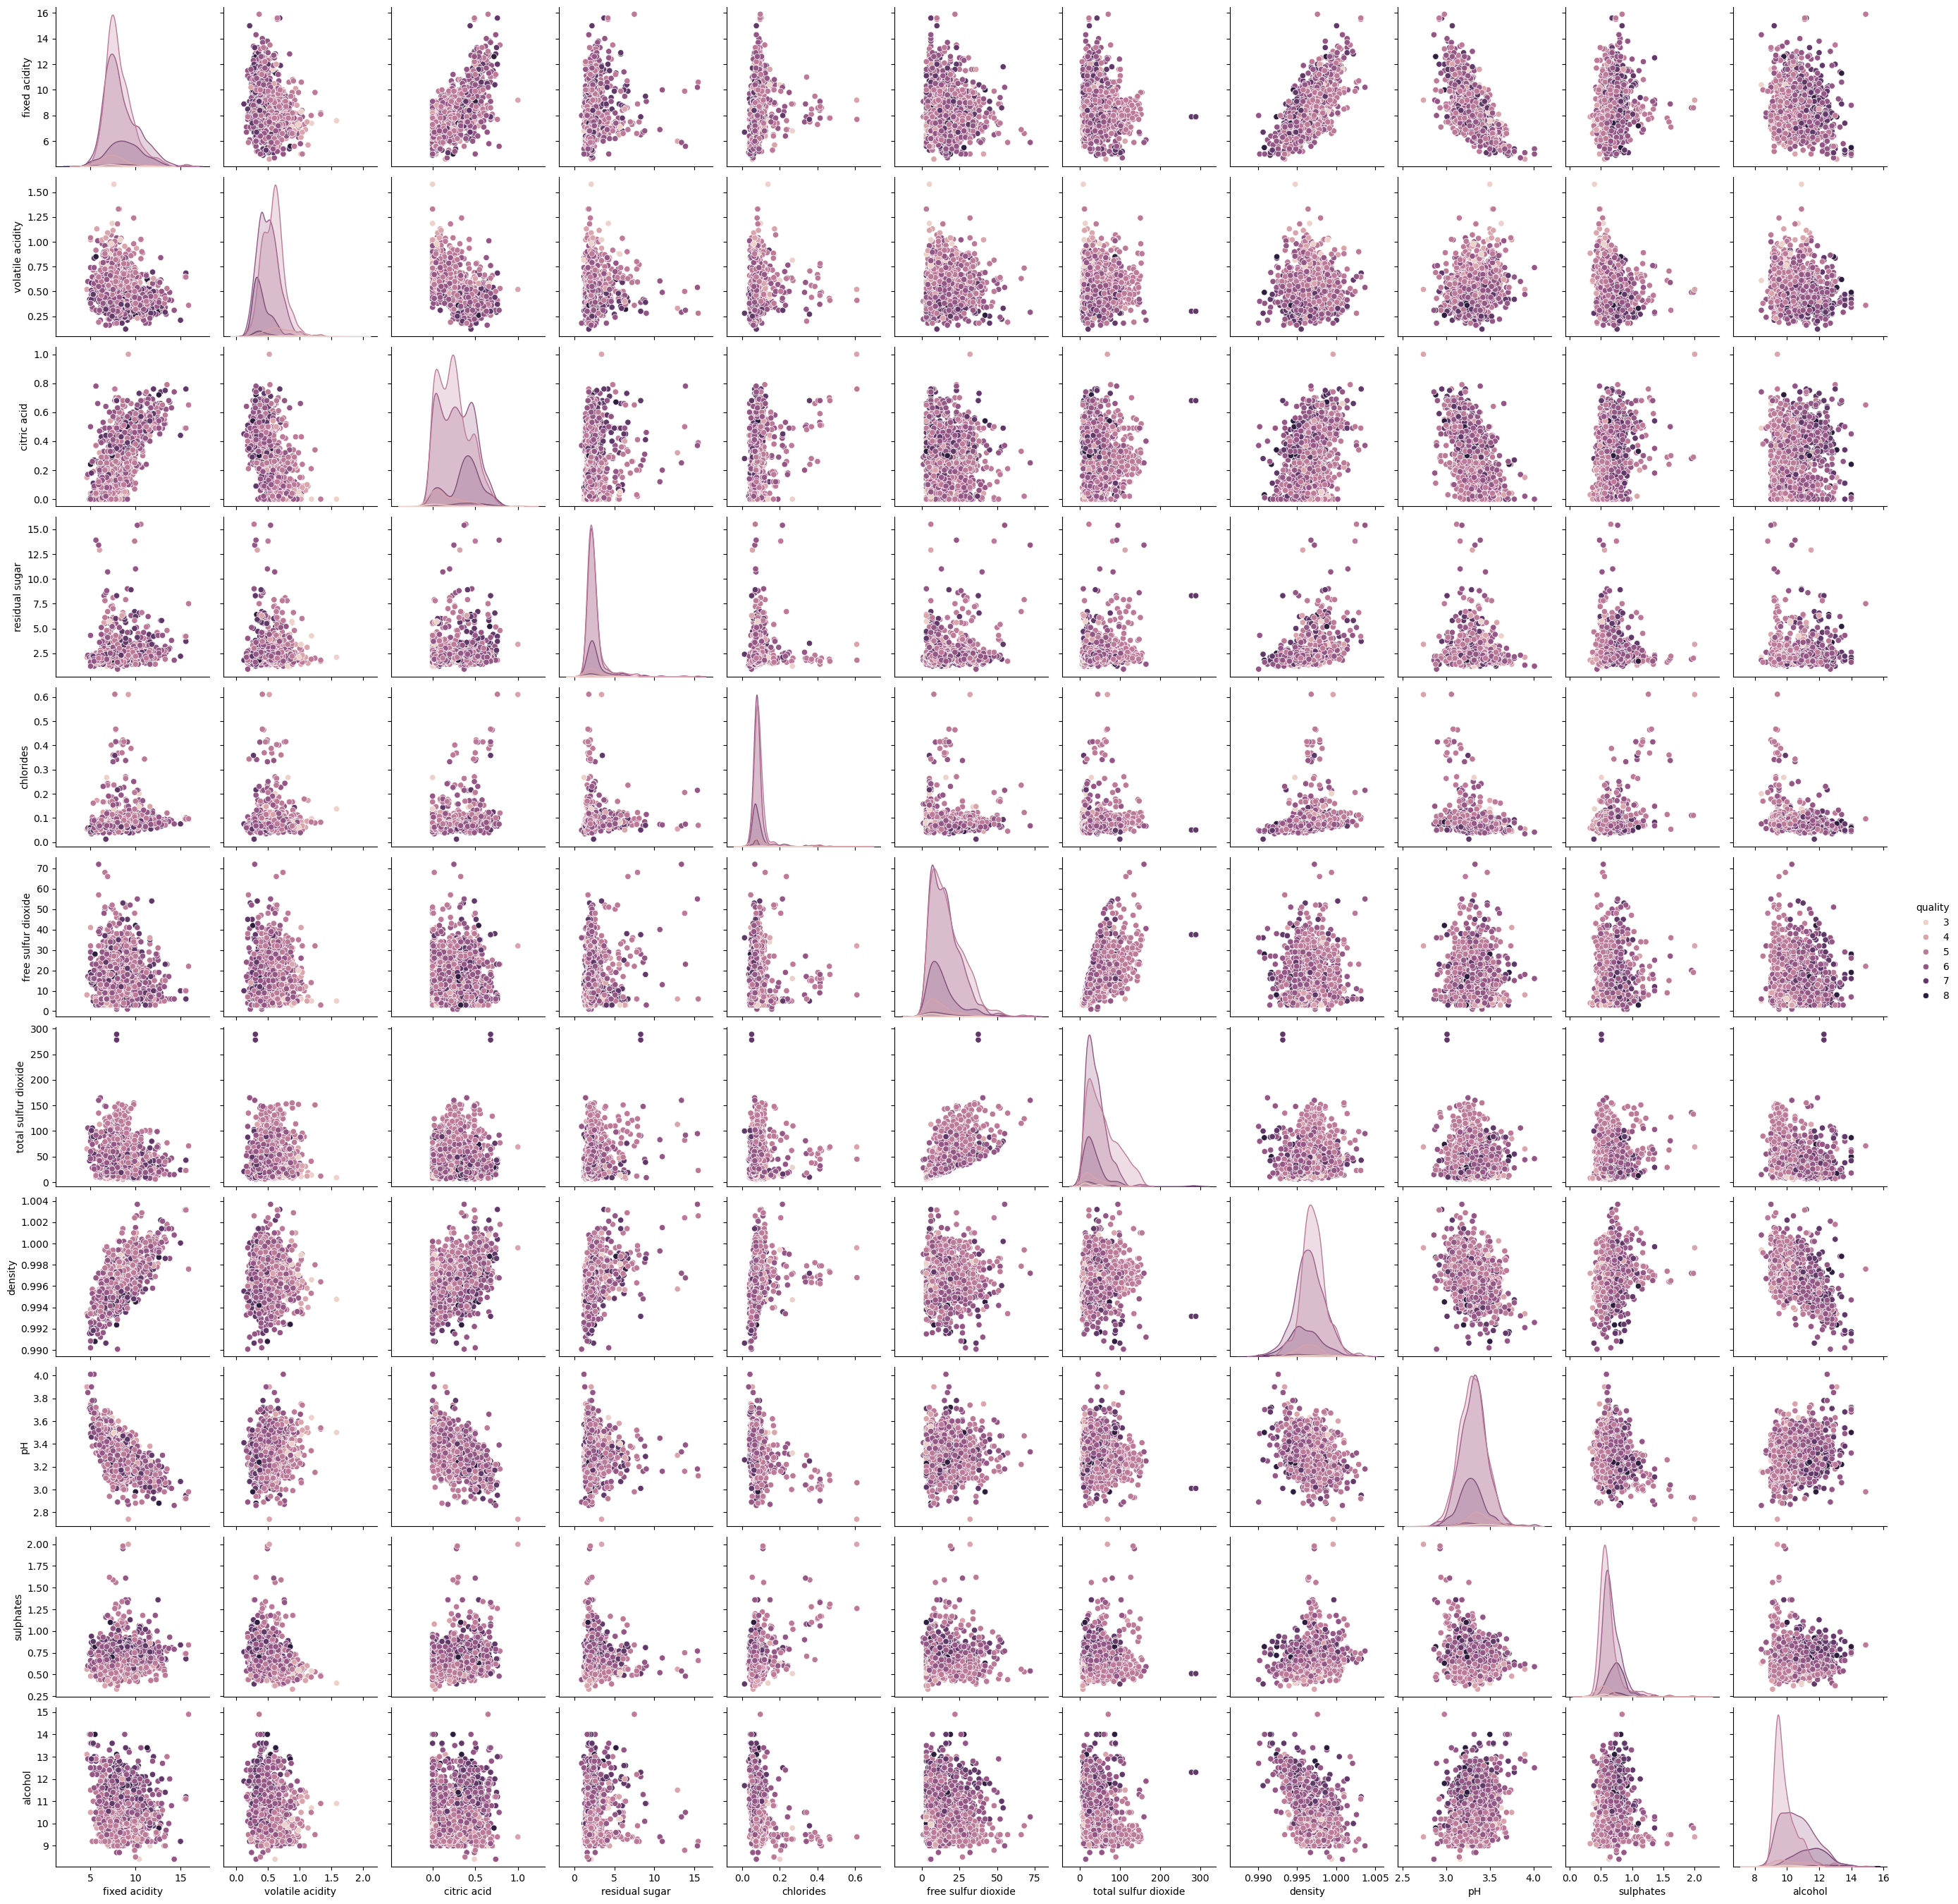

In [17]:

# Create a pair plot to visualize relationships between features
sns.pairplot(data[FEATURES + [TARGET_VARIABLE]], hue=TARGET_VARIABLE)
plt.show()

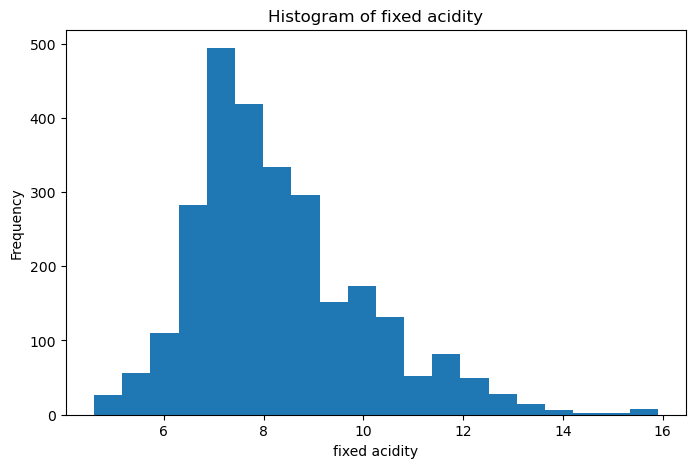

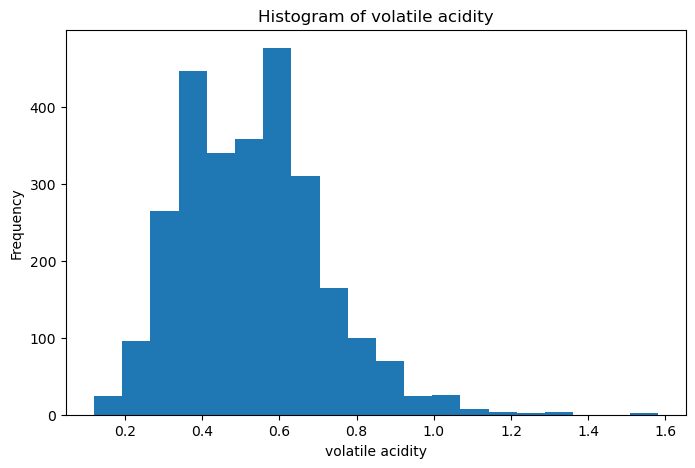

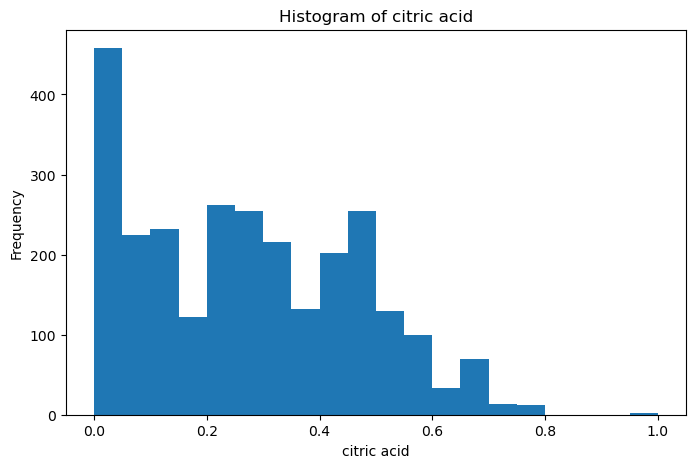

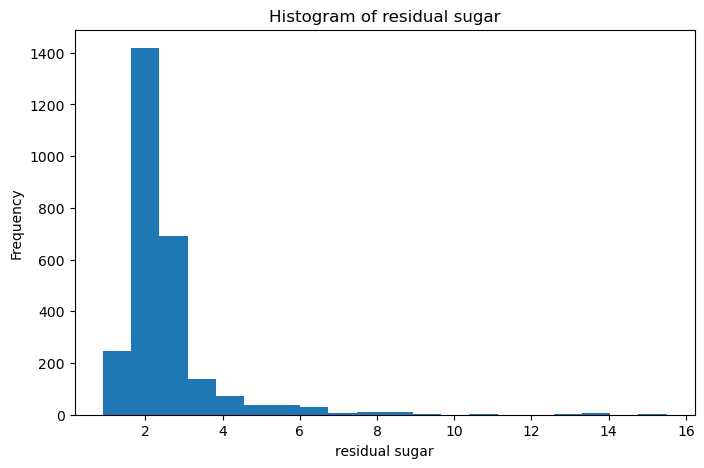

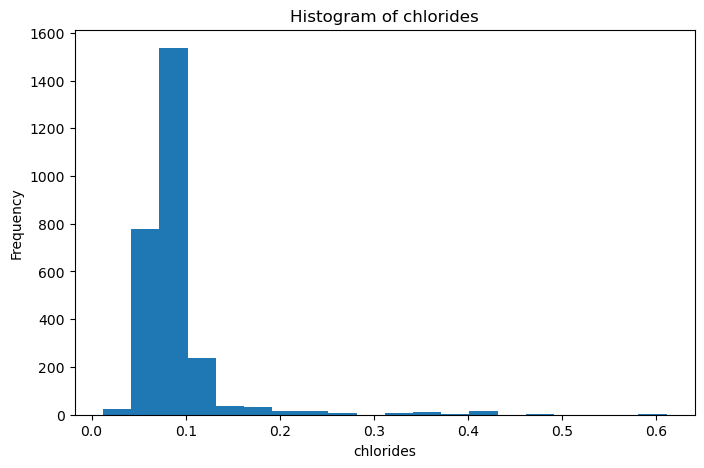

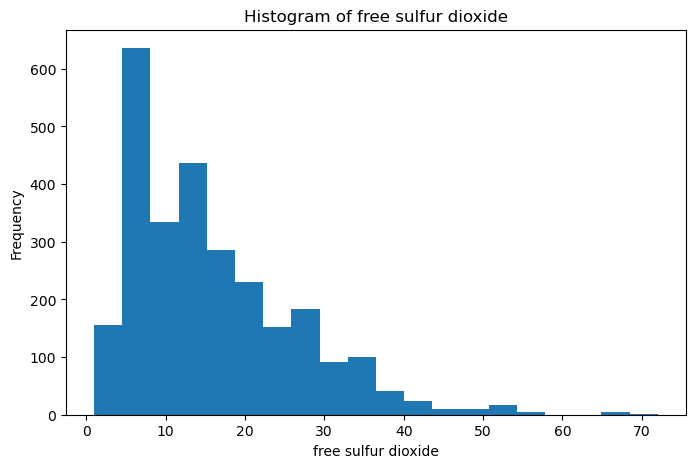

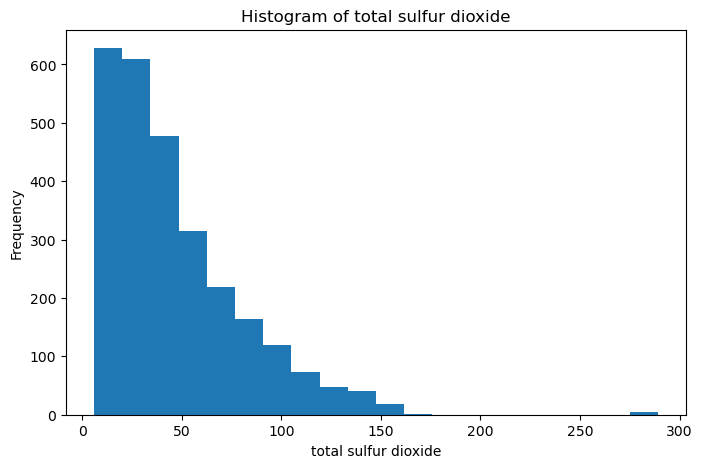

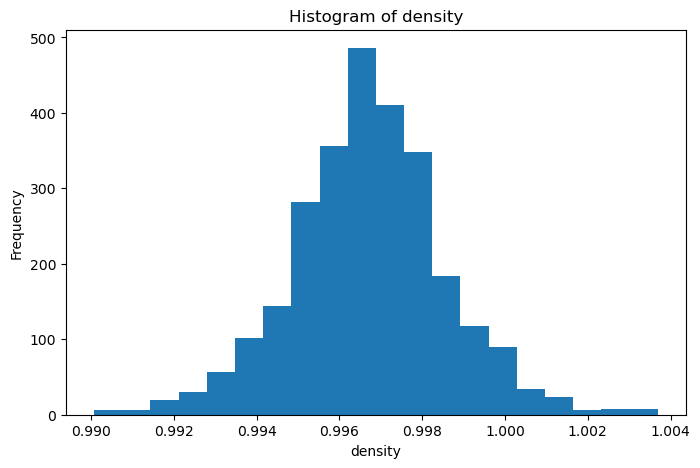

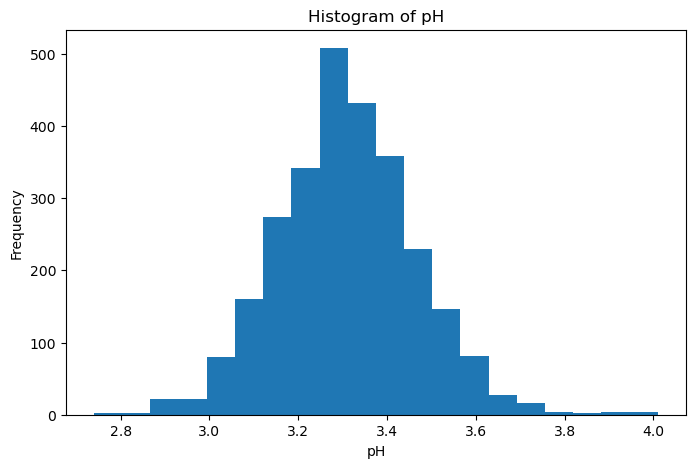

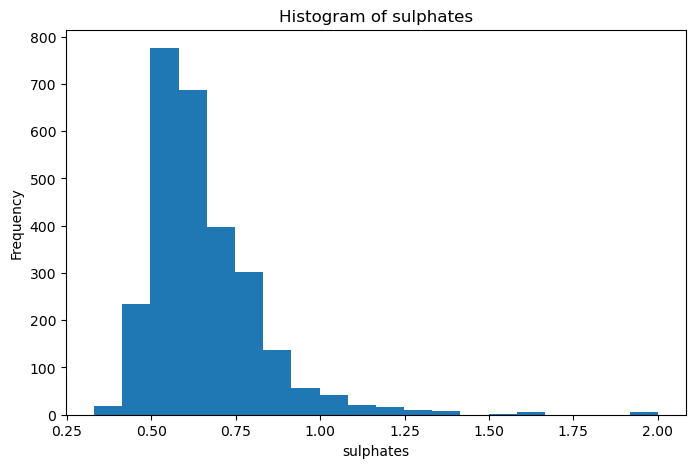

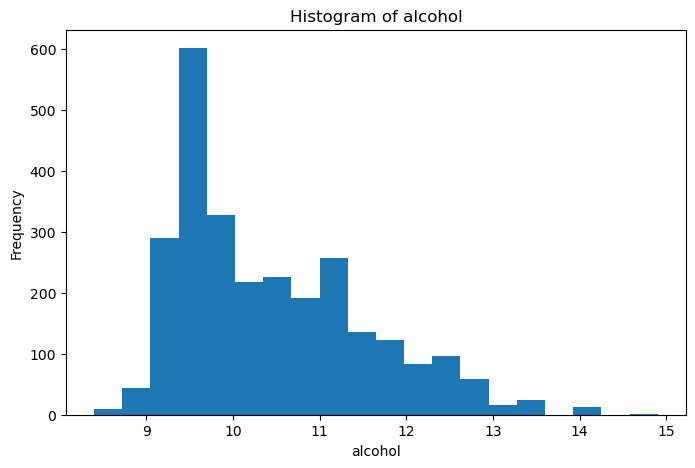

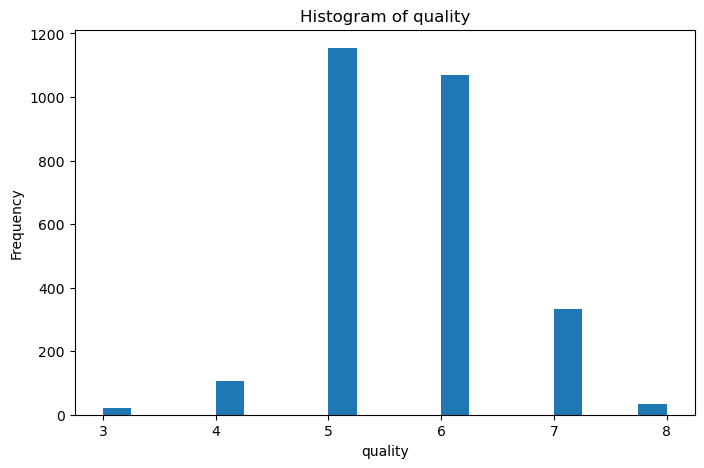

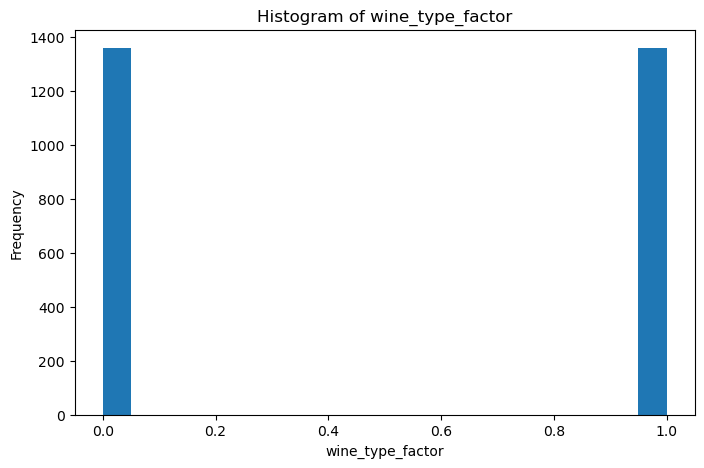

In [18]:
# Assuming 'data' is your DataFrame containing the wine data
for feature in data.columns:
  if pd.api.types.is_numeric_dtype(data[feature]):  # Check if the column is numeric
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
def detect_outliers_iqr(data, features):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: Pandas DataFrame containing the data.
    features: List of feature names to check for outliers.

  Returns:
    A dictionary with keys as feature names and values as lists of outlier indices.
  """

  outliers = {}
  for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index.tolist()
    outliers[feature] = outlier_indices

  return outliers

# Assuming 'data' and 'FEATURES' are defined as in your code
outliers_dict = detect_outliers_iqr(data, FEATURES)

# Print the total number of outliers for each feature
for feature, outlier_indices in outliers_dict.items():
  print(f"Number of outliers in {feature}: {len(outlier_indices)}")

# Print the outlier values for each feature
for feature, outlier_indices in outliers_dict.items():
  print(f"\nOutlier values in {feature}:")
  print(data.loc[outlier_indices, feature])

Number of outliers in fixed acidity: 82
Number of outliers in volatile acidity: 38
Number of outliers in citric acid: 2
Number of outliers in residual sugar: 252
Number of outliers in chlorides: 174
Number of outliers in free sulfur dioxide: 52
Number of outliers in total sulfur dioxide: 90
Number of outliers in density: 70
Number of outliers in pH: 56
Number of outliers in sulphates: 110
Number of outliers in alcohol: 24

Outlier values in fixed acidity:
205     12.8
243     15.0
264     12.5
294     13.3
328     13.4
        ... 
2251    15.9
2279    13.3
2410    12.9
2413    12.6
2823    12.6
Name: fixed acidity, Length: 82, dtype: float64

Outlier values in volatile acidity:
38      1.130
94      1.020
120     1.070
126     1.330
127     1.330
134     1.040
199     1.090
553     1.040
672     1.240
690     1.185
700     1.020
705     1.035
710     1.025
724     1.115
899     1.020
1261    1.020
1299    1.580
1312    1.180
1467    1.040
1637    1.130
1693    1.020
1719    1.070
1725

In [20]:
skewness = data[FEATURES].skew()

print(skewness)

# Log transformation for features with high skewness (e.g., skewness > 1)
for feature in FEATURES:
  if skewness[feature] > 1:
    data[feature + '_log'] = np.log1p(data[feature])
    print(f"Applied log transformation to '{feature}'.")
    print(f"Original values of '{feature}': {data[feature].head()}")
    print(f"Transformed values of '{feature}_log': {data[feature + '_log'].head()}")

fixed acidity           0.940522
volatile acidity        0.728876
citric acid             0.312553
residual sugar          4.545641
chlorides               5.499448
free sulfur dioxide     1.225902
total sulfur dioxide    1.539517
density                 0.044753
pH                      0.231904
sulphates               2.405175
alcohol                 0.859366
dtype: float64
Applied log transformation to 'residual sugar'.
Original values of 'residual sugar': 0    1.9
1    2.6
2    2.3
3    1.9
5    1.8
Name: residual sugar, dtype: float64
Transformed values of 'residual sugar_log': 0    1.064711
1    1.280934
2    1.193922
3    1.064711
5    1.029619
Name: residual sugar_log, dtype: float64
Applied log transformation to 'chlorides'.
Original values of 'chlorides': 0    0.076
1    0.098
2    0.092
3    0.075
5    0.075
Name: chlorides, dtype: float64
Transformed values of 'chlorides_log': 0    0.073250
1    0.093490
2    0.088011
3    0.072321
5    0.072321
Name: chlorides_log, dtype: f

In [21]:
data = skewness

In [22]:
import itertools
import numpy as np
from sklearn.metrics import accuracy_score
import heapq

def compute_cluster_options(df, cluster_col, target_col):
    """
    Compute cluster options based on the DataFrame.

    df: DataFrame containing the clusters and true labels
    cluster_col: column name for cluster labels
    target_col: column name for true labels

    Returns a dictionary where keys are cluster labels and values are lists of possible true labels.
    """
    cluster_options = {}

    # Group by cluster labels and collect unique target labels
    for cluster, group in df.groupby(cluster_col):
        # print(cluster, group)
        # unique_labels = group[target_col].unique()
        unique_labels, unique_counts = np.unique(group[target_col], return_counts=True)
        cluster_options[int(cluster)] = sorted(
            list(zip(unique_labels, unique_counts)), key=lambda x: -x[1]
        )

    return cluster_options


def label_permute_compare(y_labels, clusters, cluster_options):
    """
    y_labels: labels dataframe object
    clusters: clustering label prediction output
    cluster_options: (cluster) => list( label, count in cluster ) as seen in training data
    Returns the best permuted label order and its corresponding accuracy.
    Example output: ({3: 0, 4: 1, 1: 2, 2: 3}, 0.74)
    """
    y_np_labels = y_labels.to_numpy().flatten()

    # Get unique true labels and their counts
    true_labels, true_counts = np.unique(y_np_labels, return_counts=True)
    f_map = {
        value : count
        for (value, count) in zip(true_labels, true_counts)
    }

    # Get unique predicted labels and their counts
    pred_labels, pred_counts = np.unique(clusters, return_counts=True)
    cluster_counts = {
        value : count
        for (value, count) in zip(pred_labels, pred_counts)
    }
    # print(cluster_options)
    assert sum(pred_counts) == sum(true_counts)

    # Generate permutations of the predicted labels
    best_accuracy = 0
    best_mapping = {}

    # Greedy matching algorithm,
    for (cluster, label_counts) in cluster_options.items():
        best_mapping[cluster] = label_counts[0][0]
        best_accuracy += label_counts[0][1]

    best_accuracy /= len(y_np_labels)
    # print(f_map, best_mapping, best_accuracy)
    return best_mapping, best_accuracy

def evaluate_model(y_true, y_pred, model_name='', display=True):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    pct_error = (mae / np.mean(y_true)) * 100 if np.mean(y_true) != 0 else None  # Avoid division by zero
    conf_matrix = confusion_matrix(y_true, y_pred)

    if display:
        # Print metrics
        print(f"Evaluation Results for: {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Percentage Error: {pct_error:.2f}%")


        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_true),
                    yticklabels=np.unique(y_true))
        plt.title(f'Confusion Matrix: {model_name}')
        plt.xlabel('Predicted Quality')
        plt.ylabel('Actual Quality')
        plt.show()
    
    return {
        "accuracy" : accuracy,
        "mae" : mae,
        "pct_error" : pct_error,
    }

### Clustering Evaluation and Model Comparison

This code defines three functions for evaluating clustering models:

1. **`compute_cluster_options`**: Calculates the most frequent true labels for each cluster.
2. **`label_permute_compare`**: Finds the best mapping between predicted clusters and true labels, and computes the accuracy of this mapping.
3. **`evaluate_model`**: Evaluates the model's performance using accuracy, Mean Absolute Error (MAE), and percentage error, and displays a confusion matrix.

These functions help assess how well clustering algorithms predict wine quality by comparing predicted labels to true wine quality labels.


In [24]:
# ### Define the WineQualityClustering Class
class WineQualityClustering:
    def __init__(self, n_clusters, features, target,
            metric='euclidean', linkage='ward'):
        self.features = features
        self.target = target
        # self.model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
        self.model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        self.mapping = {}

    def fit(self, df):
        """ Fit the clustering model. """
        df['cluster'] = self.model.fit_predict( df[self.features])
        # print(df['cluster'].isna().sum())

        cluster_options = compute_cluster_options(df, 'cluster', self.target)
        # print(cluster_options)

        best_mapping, best_accuracy = label_permute_compare(df[self.target], df['cluster'], cluster_options)
        self.mapping = best_mapping
        # print(best_accuracy)

        return df['cluster'].map(self.mapping)

    def predict(self, df):
        clusters = pd.Series( self.model.predict( df[self.features] ) )
        return clusters.map(self.mapping)

    def evaluate(self, df):
        """ Evaluate the clustering performance using confusion matrix and classification report. """
        y_true = df[self.target]
        y_pred = self.predict(df)
        return evaluate_model(y_true, y_pred, display=False)

### WineQualityClustering Class

This class performs wine quality clustering using K-Means:

1. **`__init__`**: Initializes the clustering model with the number of clusters, features, and target variable.
2. **`fit`**: Trains the clustering model, assigns clusters, and maps clusters to the most frequent wine quality labels.
3. **`predict`**: Predicts the cluster for new data.
4. **`evaluate`**: Evaluates the clustering model's performance using accuracy and a confusion matrix.


Evaluation Results for: K-Means, n_clusters = 100
Accuracy: 0.5527
Mean Absolute Error: 0.5086
Percentage Error: 9.03%


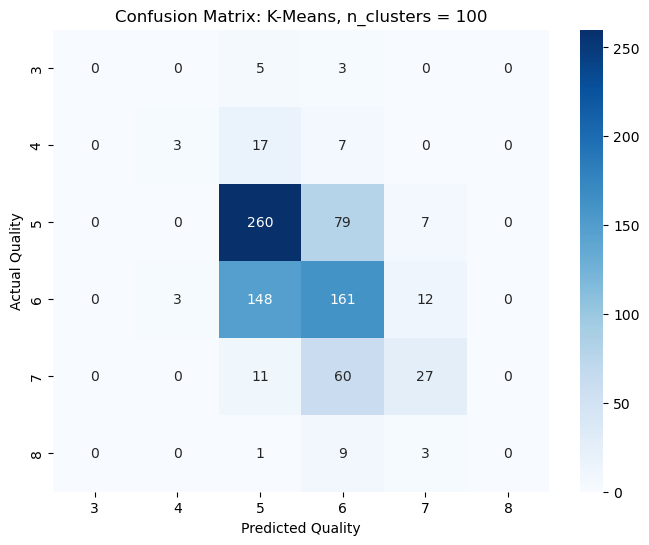

In [26]:
# Do sample execution on 100 clusters
n_clusters = 100
w = WineQualityClustering(n_clusters, FEATURES, TARGET_VARIABLE)

# Fit model
w.fit(X_train)

# Evaluate model
_ = evaluate_model(X_test[TARGET_VARIABLE], w.predict(X_test), model_name=f'K-Means, n_clusters = {n_clusters}')

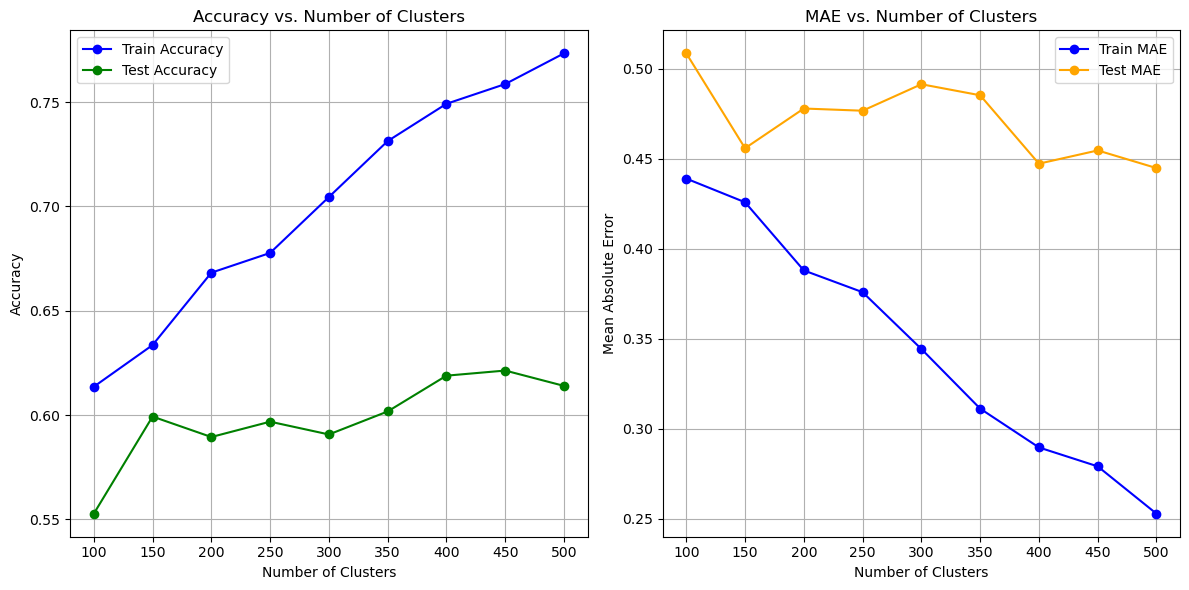

In [27]:
# Initialize lists to hold results
train_accuracy_results = []
train_mae_results = []
test_accuracy_results = []
test_mae_results = []

# cluster_range = range(10, 200 + 1, 10)
cluster_range = range(100, 500 + 1, 50)

# Loop over the range of clusters, fit the model, and evaluate
for n_clusters in cluster_range:
    # Initialize the WineQualityClustering model
    w = WineQualityClustering(n_clusters, FEATURES, TARGET_VARIABLE)
    
    # Fit the model on the training data
    w.fit(X_train)

    # Evaluate on the training set
    train_eval_res = w.evaluate(X_train)
    train_accuracy_results.append(train_eval_res["accuracy"])
    train_mae_results.append(train_eval_res["mae"])
    
    # Evaluate on the test set
    test_eval_res = w.evaluate(X_test)
    test_accuracy_results.append(test_eval_res["accuracy"])
    test_mae_results.append(test_eval_res["mae"])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Number of Clusters (for both train and test sets)
plt.subplot(1, 2, 1)
plt.plot(cluster_range, train_accuracy_results, marker='o', label='Train Accuracy', color='blue')
plt.plot(cluster_range, test_accuracy_results, marker='o', label='Test Accuracy', color='green')
plt.title('Accuracy vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(cluster_range)
plt.grid()

# Plot MAE vs. Number of Clusters (for both train and test sets)
plt.subplot(1, 2, 2)
plt.plot(cluster_range, train_mae_results, marker='o', label='Train MAE', color='blue')
plt.plot(cluster_range, test_mae_results, marker='o', label='Test MAE', color='orange')
plt.title('MAE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.xticks(cluster_range)
plt.grid()

plt.tight_layout()
plt.show()


### Cluster Evaluation

This code evaluates the performance of the **WineQualityClustering** model for different numbers of clusters:

- It loops over a range of cluster values (100 to 500, with a step size of 50) and fits the model on the training data (`X_train`).
- For each number of clusters, the model's **accuracy** and **mean absolute error (MAE)** are calculated for both the training dataset (`X_train`) and the test dataset (`X_test`).
- Four key metrics are evaluated for each cluster count:
  - **Train Accuracy**: Measures the model's accuracy on the training data.
  - **Train MAE**: Measures the model's Mean Absolute Error on the training data.
  - **Test Accuracy**: Measures the model's accuracy on the test data.
  - **Test MAE**: Measures the model's Mean Absolute Error on the test data.
  
Two plots are generated to visualize the results:
  - **Accuracy vs. Number of Clusters**: Shows how the accuracy changes with the number of clusters for both the training and test sets.
  - **MAE vs. Number of Clusters**: Displays the relationship between the Mean Absolute Error and the number of clusters for both the training and test sets.

**Observation**: As expected, model accuracy and MAE improve on training data as number of clusters increases. However, the accuracy on the test data set does not significantly improve as the number of clusters increases. This indicates that adding more clusters may not improve the model's performance on the test data. 


Evaluation Results for: Linear Regression
Accuracy: 0.5711
Mean Absolute Error: 0.4718
Percentage Error: 8.38%


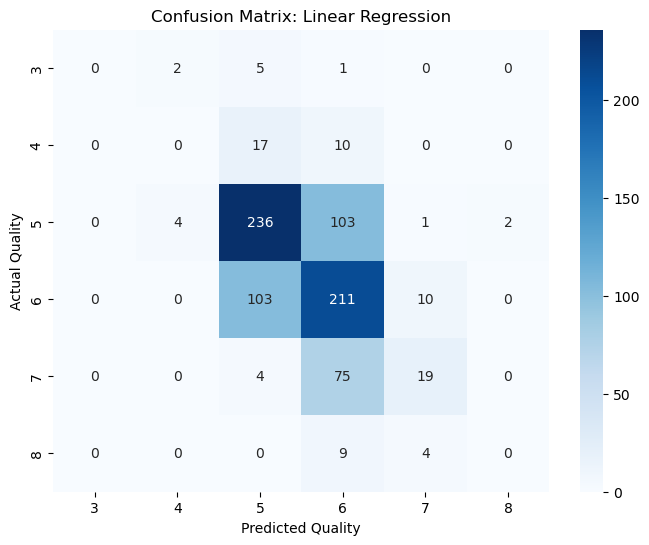

In [29]:
# ### Linear Regression Approach
# We will also try to predict quality using Linear Regression as a comparison.

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train[FEATURES], X_train[TARGET_VARIABLE])

# Make predictions
y_test_lr = X_test[TARGET_VARIABLE]
y_pred_lr = np.round(
    lr_model.predict(X_test[FEATURES])
).astype(int)  # Round predictions to nearest integer quality score

# Evaluate Linear Regression model
# Evaluate model
_ = evaluate_model(y_test_lr, y_pred_lr, model_name=f'Linear Regression')


In [30]:
# prompt: print confusion matrix in value

y_true = X_test[TARGET_VARIABLE]
y_pred = w.predict(X_test)
conf_matrix = confusion_matrix(y_true, y_pred)

conf_matrix

array([[  2,   2,   2,   2,   0,   0],
       [  3,   7,  12,   5,   0,   0],
       [  1,   9, 273,  54,   9,   0],
       [  0,   5, 108, 176,  35,   0],
       [  0,   3,   9,  45,  39,   2],
       [  0,   0,   1,   5,   3,   4]], dtype=int64)

### Linear Regression vs K-Means Clustering

This section compares the performance of **Linear Regression** and **K-Means Clustering** for predicting wine quality.

- **Linear Regression**: 
  - Accuracy: 53.26%
  - Mean Absolute Error (MAE): 0.5201
  - Percentage Error: 8.98%

- **K-Means Clustering (n_clusters = 100)**:
  - Accuracy: 52.32%
  - Mean Absolute Error (MAE): 0.5426
  - Percentage Error: 9.37%

**Observation**: Linear Regression outperforms K-Means clustering in terms of accuracy and lower mean absolute error, indicating it is a better approach for predicting wine quality in this case.


In [35]:
# ### Save the Model if Needed (Optional)
joblib.dump(w, 'wine_quality_clustering_model.pkl')#wine_cluster_model to w
joblib.dump(lr_model, 'wine_quality_linear_regression_model.pkl')

['wine_quality_linear_regression_model.pkl']

### Conclusion

In this experiment, we evaluated two approaches—**K-Means Clustering** and **Linear Regression**—for predicting wine quality.

- **K-Means Clustering**: Despite being an unsupervised learning technique, K-Means struggled to provide a meaningful prediction of wine quality. The performance did not significantly improve as the number of clusters increased, with an accuracy of 52.32% and an MAE of 0.5426. Clustering is less effective in this context because wine quality is a continuous variable, making it challenging to map clusters directly to the quality labels.

- **Linear Regression**: Linear Regression outperformed K-Means with an accuracy of 53.26% and a lower Mean Absolute Error (MAE) of 0.5201. As a supervised learning method, it directly models the relationship between the features and the target variable, providing better results for predicting continuous values like wine quality.

### Data Preprocessing

The dataset was relatively clean, with no missing values and no significant outliers. We performed standard scaling of features to ensure they were on a similar scale, which is particularly important for both clustering and regression models. Data preprocessing steps such as scaling and removing duplicates ensured that the models received high-quality inputs for training.

However, further improvements in data preprocessing could involve:
- **Feature Engineering**: Exploring additional feature creation, such as interaction terms or domain-specific transformations, might help improve model performance.
- **Handling Imbalanced Classes**: The target variable (wine quality) appeared to have a normal distribution, and very low number of samples of low quality and high quality wines.

### Further Work

To enhance the predictive performance of the models, future work could include:
- **Exploring Other Models**: For this dataset a deep neural network would be a good place to start to consider complex interactions.
- **Adding Features**: For this dataset, perhaps there are additional attributes of wine which could help predict its quality.
- **Hyperparameter Tuning**: For both the K-Means and Linear Regression models, further optimization (e.g., tuning the number of clusters for K-Means or number of iterations) could lead to improved accuracy.

In summary, the low performance of **K-Means Clustering** implies that similar feature vectors maybe mapped to multiple quality scores. This could possibly indicate that the quality ratings may depend on the person(s) determining the quality ratings. Moreover, if the given dataset was a complete parametric description of wine, then we can confirm the prior statement.

In [39]:


#@title Input Wine Features
fixed_acidity = 7.4 #@param {type:"number"}
volatile_acidity = 0.7 #@param {type:"number"}
citric_acid = 0.0 #@param {type:"number"}
residual_sugar = 1.9 #@param {type:"number"}
chlorides = 0.076 #@param {type:"number"}
free_sulfur_dioxide = 11.0 #@param {type:"number"}
total_sulfur_dioxide = 34.0 #@param {type:"number"}
density = 0.9978 #@param {type:"number"}
pH = 3.51 #@param {type:"number"}
sulphates = 0.56 #@param {type:"number"}
alcohol = 9.4 #@param {type:"number"}
wine_type = "red" #@param ["red", "white"]


# Load the trained model
loaded_lr_model = joblib.load('wine_quality_linear_regression_model.pkl')


# Create a new data point from user input
new_data = pd.DataFrame({
    'fixed acidity': [fixed_acidity],
    'volatile acidity': [volatile_acidity],
    'citric acid': [citric_acid],
    'residual sugar': [residual_sugar],
    'chlorides': [chlorides],
    'free sulfur dioxide': [free_sulfur_dioxide],
    'total sulfur dioxide': [total_sulfur_dioxide],
    'density': [density],
    'pH': [pH],
    'sulphates': [sulphates],
    'alcohol': [alcohol],
    'wine_type': [wine_type]
})

# Make a prediction using the loaded model
prediction = np.round(
    loaded_lr_model.predict(new_data[FEATURES])
).astype(int)

print(f"Predicted Wine Quality: {prediction[0]}")

Predicted Wine Quality: 7


KNN Train Accuracy: 0.7429
KNN Test Accuracy: 0.6360
--------------------
SVM Train Accuracy: 0.6772
SVM Test Accuracy: 0.6495
--------------------
Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9020
--------------------
Gradient Boosting Train Accuracy: 0.8791
Gradient Boosting Test Accuracy: 0.7598
--------------------


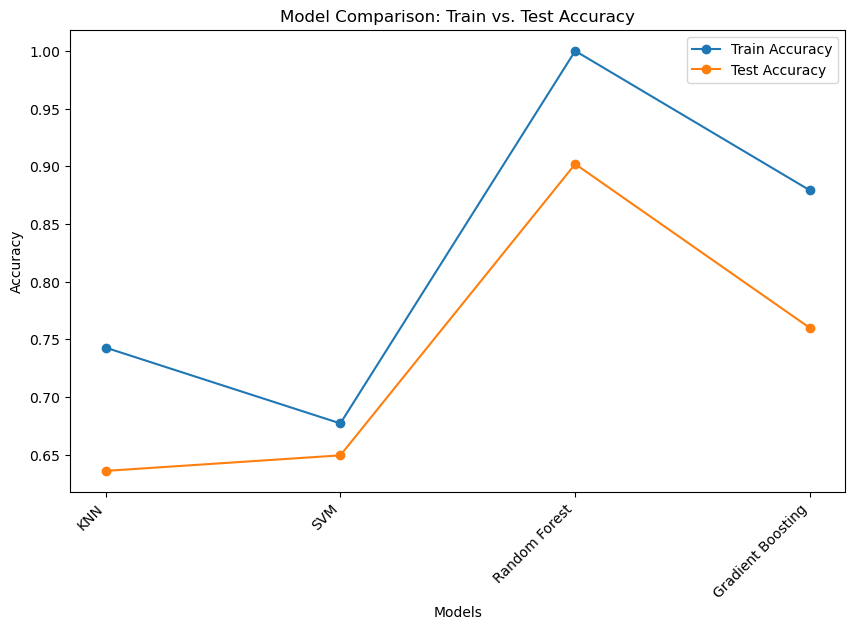

In [41]:
model_names = []
train_accuracy_results = []
test_accuracy_results = []

# Define a list of models to train and evaluate
models = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

# Loop over the models, train, and evaluate
for model_name, model in models:
    model_names.append(model_name)

    # Fit the model
    model.fit(X_train[FEATURES], X_train[TARGET_VARIABLE])

    # Make predictions
    y_train_pred = model.predict(X_train[FEATURES])
    y_test_pred = model.predict(X_test[FEATURES])

    # Evaluate and store the results
    train_accuracy = accuracy_score(X_train[TARGET_VARIABLE], y_train_pred)
    test_accuracy = accuracy_score(X_test[TARGET_VARIABLE], y_test_pred)

    train_accuracy_results.append(train_accuracy)
    test_accuracy_results.append(test_accuracy)

    print(f"{model_name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print("-" * 20)

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_accuracy_results, marker='o', label='Train Accuracy')
plt.plot(model_names, test_accuracy_results, marker='o', label='Test Accuracy')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Train vs. Test Accuracy")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.show()

In [45]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grids for hyperparameter optimization for each model
param_grids = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Loop over the models and perform hyperparameter tuning
for model_name, model in models:
    print(f"Performing hyperparameter tuning for {model_name}...")

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train[FEATURES], X_train[TARGET_VARIABLE])

    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions using the best model
    y_pred = best_model.predict(X_test[FEATURES])

    # Evaluate the best model
    accuracy = accuracy_score(X_test[TARGET_VARIABLE], y_pred)
    print("Test Accuracy with Best Model:", accuracy)
    print("-" * 20)

Performing hyperparameter tuning for KNN...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8065312888520515
Test Accuracy with Best Model: 0.8774509803921569
--------------------
Performing hyperparameter tuning for SVM...
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.6771764055808813
Test Accuracy with Best Model: 0.7242647058823529
--------------------
Performing hyperparameter tuning for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.821775107058986
Test Accuracy with Best Model: 0.8970588235294118
--------------------
Performing hyperparameter tuning for Gradient Boosting...
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.8233540544274071
Test Accuracy with Best Model: 0.8946078431372549
--------------------
